In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2. Load the dataset.

In [3]:
ss = pd.read_csv(r"/content/Mall_Customers.csv")
ss.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.

# a) Univariate Analysis.

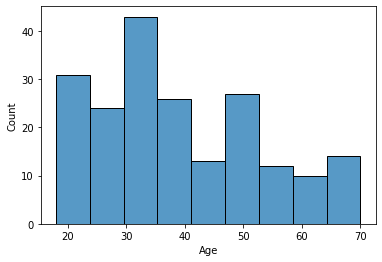

In [5]:
sns.histplot(ss['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


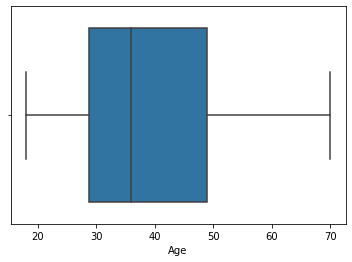

In [6]:
sns.boxplot(ss['Age'])

# b) Bi- Variate Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


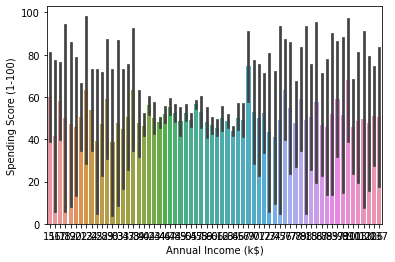

In [7]:
sns.barplot(ss['Annual Income (k$)'],ss['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


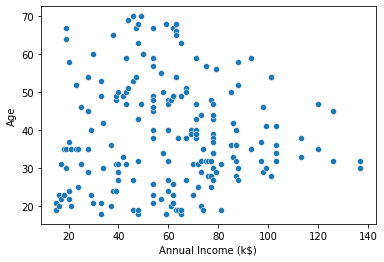

In [8]:
sns.scatterplot(ss['Annual Income (k$)'],ss['Age'])

# c) Multi-Variate Analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


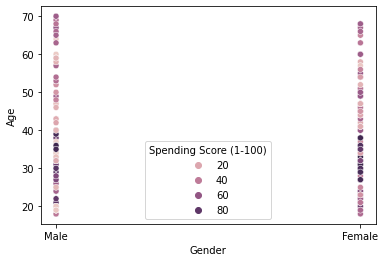

In [9]:
sns.scatterplot(ss['Gender'],ss['Age'],ss['Spending Score (1-100)'])

# 4. Perform descriptive statistics on the dataset.

In [93]:
ss.mean()

CustomerID                100.50
Gender                      0.44
Age                         7.00
Annual Income (k$)          7.00
Spending Score (1-100)     50.20
dtype: float64

In [92]:
ss.median()

CustomerID                100.5
Gender                      0.0
Age                         7.0
Annual Income (k$)          7.0
Spending Score (1-100)     50.0
dtype: float64

In [91]:
ss.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.0,7.0,7.0,42.0
1,2,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


In [90]:
ss.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.0,200.0,200.000000
mean,100.500000,0.440000,7.0,7.0,50.200000
std,57.879185,0.497633,0.0,0.0,25.823522
min,1.000000,0.000000,7.0,7.0,1.000000
25%,50.750000,0.000000,7.0,7.0,34.750000
50%,100.500000,0.000000,7.0,7.0,50.000000
75%,150.250000,1.000000,7.0,7.0,73.000000
max,200.000000,1.000000,7.0,7.0,99.000000


# 5. Check for Missing values and deal with them.

In [89]:
ss.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Find the outliers and replace them outliers.

In [88]:
r = ss.quantile([0.95,0.65])
r

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,1.0,7.0,7.0,92.00
0.65,130.35,1.0,7.0,7.0,58.35


In [87]:
ir = r.iloc[0]-r.iloc[1]
ir

CustomerID                59.70
Age                       22.05
Annual Income (k$)        32.00
Spending Score (1-100)    33.65
dtype: float64

In [86]:
v = r.iloc[0]+(1.5*ir)
v

CustomerID                279.600
Age                        99.125
Annual Income (k$)        151.000
Spending Score (1-100)    142.475
dtype: float64

In [85]:
a = r.iloc[1]-(1.5*ir)
a

CustomerID                40.800
Age                       10.925
Annual Income (k$)        23.000
Spending Score (1-100)     7.875
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


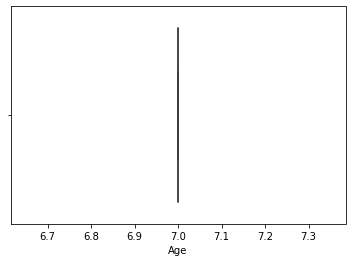

In [84]:
ss['Age']=np.where(ss['Age']>10,7,ss['Age'])
sns.boxplot(ss['Age'])

# 7. Check for Categorical columns and perform encoding.

In [83]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L = LabelEncoder()
O=OneHotEncoder()
ss['Gender']=L.fit_transform(ss['Gender'])
ss.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,7,7,39
1,2,1,7,7,81
2,3,0,7,7,6
3,4,0,7,7,77
4,5,0,7,7,40


# 8. Scaling the data.

In [82]:
a = ss.drop('Annual Income (k$)',axis=1) 
B = ss['Annual Income (k$)'] 
a

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,1,7,39
1,2,1,7,81
2,3,0,7,6
3,4,0,7,77
4,5,0,7,40
...,...,...,...,...
195,196,0,7,79
196,197,0,7,28
197,198,1,7,74
198,199,1,7,18


In [81]:
B

0      7
1      7
2      7
3      7
4      7
      ..
195    7
196    7
197    7
198    7
199    7
Name: Annual Income (k$), Length: 200, dtype: int64

In [80]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
MM =MinMaxScaler()
a_scale=MM.fit_transform(a)
a_scale

array([[0.        , 1.        , 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.        , 0.81632653],
       [0.01005025, 0.        , 0.        , 0.05102041],
       [0.01507538, 0.        , 0.        , 0.7755102 ],
       [0.0201005 , 0.        , 0.        , 0.39795918],
       [0.02512563, 0.        , 0.        , 0.76530612],
       [0.03015075, 0.        , 0.        , 0.05102041],
       [0.03517588, 0.        , 0.        , 0.94897959],
       [0.04020101, 1.        , 0.        , 0.02040816],
       [0.04522613, 0.        , 0.        , 0.7244898 ],
       [0.05025126, 1.        , 0.        , 0.13265306],
       [0.05527638, 0.        , 0.        , 1.        ],
       [0.06030151, 0.        , 0.        , 0.14285714],
       [0.06532663, 0.        , 0.        , 0.7755102 ],
       [0.07035176, 1.        , 0.        , 0.12244898],
       [0.07537688, 1.        , 0.        , 0.79591837],
       [0.08040201, 0.        , 0.        , 0.34693878],
       [0.08542714, 1.        ,

# 9. Perform any of the clustering algorithms.

In [79]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster=KM.fit_predict(a_scale)
cluster

array([1, 1, 6, 4, 6, 4, 6, 4, 1, 4, 1, 4, 6, 4, 1, 1, 6, 1, 1, 4, 1, 1,
       6, 1, 6, 1, 6, 1, 6, 4, 1, 4, 1, 1, 6, 4, 6, 4, 6, 4, 6, 1, 1, 4,
       6, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 7, 5, 3, 2, 3, 2, 3, 2,
       7, 5, 3, 5, 7, 2, 3, 5, 7, 2, 7, 5, 3, 2, 3, 5, 7, 2, 3, 2, 7, 5,
       7, 5, 3, 5, 3, 5, 7, 5, 3, 5, 3, 5, 3, 5, 7, 2, 3, 2, 3, 2, 7, 5,
       3, 2, 3, 2, 7, 5, 3, 5, 7, 2, 7, 2, 7, 5, 7, 5, 3, 5, 7, 5, 7, 2,
       3, 2], dtype=int32)

# 10. Add the cluster data with the primary dataset.

In [78]:
ss.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [77]:
sv = pd.DataFrame(a_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
sv.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.387755
1,0.005025,1.0,0.0,0.816327
2,0.010050,0.0,0.0,0.051020
3,0.015075,0.0,0.0,0.775510
4,0.020101,0.0,0.0,0.397959


In [76]:
sv['Cluster']=pd.Series(cluster)
sv.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.0,0.387755,0
1,0.005025,1.0,0.0,0.816327,0
2,0.010050,0.0,0.0,0.051020,6
3,0.015075,0.0,0.0,0.775510,5
4,0.020101,0.0,0.0,0.397959,6


# 11. Split the data into dependent and independent variables.

In [74]:
X = sv.iloc[:,0:4]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.0,0.387755
1,0.005025,1.0,0.0,0.816327
2,0.010050,0.0,0.0,0.051020
3,0.015075,0.0,0.0,0.775510
4,0.020101,0.0,0.0,0.397959
...,...,...,...,...
195,0.979899,0.0,0.0,0.795918
196,0.984925,0.0,0.0,0.275510
197,0.989950,1.0,0.0,0.744898
198,0.994975,1.0,0.0,0.173469


In [75]:
Y = sv['Cluster']
Y

0      0
1      0
2      6
3      5
4      6
      ..
195    7
196    4
197    3
198    2
199    3
Name: Cluster, Length: 200, dtype: int32

# 12. Split the data into training and testing.

In [73]:
from sklearn.model_selection import train_test_split
a_train,a_test,B_train,B_test=train_test_split(a_scale,Y,test_size=0.3,random_state=1)

# 13. Build the Model.

# 14. Train the Model.

In [72]:
from sklearn.linear_model import LogisticRegression
sr = LogisticRegression()
sr.fit(a_train,B_train)

LogisticRegression()

# 15. Test the Model

In [71]:
predict_test=sr.predict(a_test)
predict_test

array([1, 1, 1, 0, 4, 2, 0, 1, 1, 4, 3, 0, 1, 1, 0, 1, 7, 1, 4, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 7, 0, 1, 7, 4, 3, 2, 1, 4, 1, 1, 2, 0, 0, 7, 0,
       1, 1, 1, 1, 3, 1, 0, 0, 1, 0, 0, 3, 7, 1, 3, 2], dtype=int32)

In [70]:
B_test

58     1
40     6
34     6
102    0
184    4
198    2
95     0
4      6
29     5
168    4
171    3
18     0
11     5
89     1
110    0
118    1
159    7
35     5
136    4
59     0
51     0
16     6
44     6
94     1
31     5
162    2
38     6
28     6
193    7
27     0
47     1
165    7
194    4
177    3
176    2
97     1
174    4
73     1
69     1
172    2
108    0
107    0
189    7
14     0
56     1
19     5
114    1
39     5
185    3
124    4
98     0
123    3
119    1
53     0
33     0
179    3
181    7
106    1
199    3
138    2
Name: Cluster, dtype: int32

# 16. Measure the performance using Evaluation Metrics.

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,B_test)

0.75

In [68]:
from sklearn.naive_bayes import CategoricalNB
nb=CategoricalNB()
nb.fit(a_train,B_train)

CategoricalNB()

In [67]:
pred_test=nb.predict(a_test)
pred_test

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [66]:
B_test

58     1
40     6
34     6
102    0
184    4
198    2
95     0
4      6
29     5
168    4
171    3
18     0
11     5
89     1
110    0
118    1
159    7
35     5
136    4
59     0
51     0
16     6
44     6
94     1
31     5
162    2
38     6
28     6
193    7
27     0
47     1
165    7
194    4
177    3
176    2
97     1
174    4
73     1
69     1
172    2
108    0
107    0
189    7
14     0
56     1
19     5
114    1
39     5
185    3
124    4
98     0
123    3
119    1
53     0
33     0
179    3
181    7
106    1
199    3
138    2
Name: Cluster, dtype: int32

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,B_test)

0.4166666666666667

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(a_train,B_train)

DecisionTreeClassifier()

In [63]:
pre_test=dtc.predict(a_test)
pre_test

array([1, 6, 6, 0, 4, 2, 0, 6, 5, 4, 3, 0, 5, 1, 0, 1, 7, 5, 4, 0, 0, 6,
       6, 1, 5, 2, 6, 6, 7, 0, 1, 7, 4, 3, 2, 1, 4, 1, 1, 2, 0, 0, 7, 0,
       1, 5, 1, 5, 3, 4, 0, 0, 1, 0, 0, 3, 7, 1, 3, 2], dtype=int32)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(pre_test,B_test)

0.9833333333333333